#
#모델링1 : y값과 영향있는 변수만 제거

In [1]:
# 데이터 불러오기 

In [2]:
import pandas as pd
import numpy as np

In [3]:
rdf= pd.read_csv("team2.csv",encoding='utf-8',index_col=0)

In [4]:
rdf

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
2000,640089,558932.0,200400.0,47008111.0,75391264.0,27525025.0,44.8,172267511.0,160481015.0,947394.8,...,10.1,34.3,248740.0,4.4,15.5,326104.0,1.9,42.3,19276,8494
2001,559934,558932.0,200400.0,47370164.0,75391264.0,27525025.0,44.8,150439144.0,141097821.0,947394.8,...,10.5,36.2,243813.0,4.0,15.5,326104.0,1.9,42.1,20097,8407
2002,496911,558932.0,200400.0,47644736.0,75391264.0,27525025.0,44.8,162470528.0,152126153.0,1020582.4,...,11.0,38.6,247524.0,3.3,15.5,326104.0,1.9,42.0,22147,8343
2003,495036,558932.0,200400.0,47892330.0,75391264.0,27525025.0,44.8,193817443.0,178826657.0,1052703.1,...,11.5,41.1,246463.0,3.6,15.5,326104.0,1.9,42.0,24142,8292
2004,476958,558932.0,200400.0,48082519.0,75391264.0,27525025.0,38.8,253844672.0,224462687.0,1107416.2,...,12.0,43.8,246220.0,3.7,15.5,326104.0,1.9,42.2,26903,8246
2005,438707,558932.0,200400.0,48184561.0,75391264.0,27525025.0,38.8,284418743.0,261238264.0,1155129.7,...,12.5,46.8,245874.0,3.7,20.0,326104.0,1.9,42.6,28367,8275
2006,451759,558932.0,200400.0,48438292.0,75391264.0,27525025.0,38.8,325464848.0,309382632.0,1215939.5,...,13.0,50.4,244162.0,3.5,20.0,326104.0,1.9,42.6,29233,8290
2007,496822,558932.0,200400.0,48683638.0,75391264.0,27525025.0,39.8,371489086.0,356845733.0,1286458.5,...,13.5,54.6,246482.0,3.2,20.0,326104.0,1.9,43.0,30856,8294
2008,465892,558932.0,209095.0,49054708.0,75391264.0,27525025.0,39.8,422007328.0,435274737.0,1325219.3,...,14.0,58.8,246113.0,3.2,20.0,326104.0,1.9,43.2,33499,8344
2009,444849,558932.0,216259.0,49307835.0,75391264.0,27525025.0,39.8,363533561.0,323084521.0,1335724.3,...,14.4,62.9,246942.0,3.6,20.0,326104.0,1.9,43.0,35550,8373


In [5]:
# 종속변수/ 독립변수 지정
Y=rdf.iloc[:,:1]
X=rdf.iloc[:,1:]

In [6]:
# 표준화 (min-max : 0~1 사이)

In [7]:
from sklearn.preprocessing import minmax_scale
minmax_X = minmax_scale(X)


In [8]:
minmax_Y = minmax_scale(Y)

In [9]:
rdf.iloc[:,1:]=minmax_X
rdf.iloc[:,:1]=minmax_Y

In [10]:
rdf

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
2000,1.000000,0.148319,0.581700,0.000000,0.000000,0.000000,0.530973,0.048036,0.049183,0.000000,...,0.000000,0.000000,0.089570,1.000000,0.000000,0.958259,0.275362,0.069767,0.000000,0.316731
2001,0.744132,0.148319,0.581700,0.078732,0.000000,0.000000,0.530973,0.000000,0.000000,0.000000,...,0.042105,0.024485,0.000000,0.692308,0.000000,0.958259,0.275362,0.023256,0.033518,0.205619
2002,0.542952,0.148319,0.581700,0.138441,0.000000,0.000000,0.530973,0.026476,0.027983,0.085068,...,0.094737,0.055412,0.067464,0.153846,0.000000,0.958259,0.275362,0.000000,0.117212,0.123883
2003,0.536967,0.148319,0.581700,0.192283,0.000000,0.000000,0.530973,0.095458,0.095733,0.122403,...,0.147368,0.087629,0.048176,0.384615,0.000000,0.958259,0.275362,0.000000,0.198661,0.058748
2004,0.479259,0.148319,0.581700,0.233642,0.000000,0.000000,0.000000,0.227555,0.211530,0.185998,...,0.200000,0.122423,0.043758,0.461538,0.000000,0.958259,0.275362,0.046512,0.311382,0.000000
2005,0.357155,0.148319,0.581700,0.255832,0.000000,0.000000,0.000000,0.294836,0.304844,0.241456,...,0.252632,0.161082,0.037468,0.461538,0.328467,0.958259,0.275362,0.139535,0.371152,0.037037
2006,0.398820,0.148319,0.581700,0.311009,0.000000,0.000000,0.000000,0.385162,0.427005,0.312137,...,0.305263,0.207474,0.006345,0.307692,0.328467,0.958259,0.275362,0.139535,0.406508,0.056194
2007,0.542668,0.148319,0.581700,0.364362,0.000000,0.000000,0.088496,0.486444,0.547438,0.394104,...,0.357895,0.261598,0.048521,0.076923,0.328467,0.958259,0.275362,0.232558,0.472769,0.061303
2008,0.443934,0.148319,0.811041,0.445055,0.000000,0.000000,0.088496,0.597614,0.746444,0.439157,...,0.410526,0.315722,0.041813,0.076923,0.328467,0.958259,0.275362,0.279070,0.580673,0.125160
2009,0.376762,0.148319,1.000000,0.500101,0.000000,0.000000,0.088496,0.468937,0.461773,0.451367,...,0.452632,0.368557,0.056884,0.384615,0.328467,0.958259,0.275362,0.232558,0.664408,0.162197


In [11]:
rdf

,출생아수,졸업자수,사교육비,인구,직장가입자,지역가입자,사회단체참여율,수출,수입,실질국내총생산(GDP),...,노년부양비,노령화지수,사망자수,실업률,1인가구 비율,혼인건수(건),주택매매가격동향,\t맞벌이가구비율,유치원수,어린이집수
2000,1.000000,0.148319,0.581700,0.000000,0.000000,0.000000,0.530973,0.048036,0.049183,0.000000,...,0.000000,0.000000,0.089570,1.000000,0.000000,0.958259,0.275362,0.069767,0.000000,0.316731
2001,0.744132,0.148319,0.581700,0.078732,0.000000,0.000000,0.530973,0.000000,0.000000,0.000000,...,0.042105,0.024485,0.000000,0.692308,0.000000,0.958259,0.275362,0.023256,0.033518,0.205619
2002,0.542952,0.148319,0.581700,0.138441,0.000000,0.000000,0.530973,0.026476,0.027983,0.085068,...,0.094737,0.055412,0.067464,0.153846,0.000000,0.958259,0.275362,0.000000,0.117212,0.123883
2003,0.536967,0.148319,0.581700,0.192283,0.000000,0.000000,0.530973,0.095458,0.095733,0.122403,...,0.147368,0.087629,0.048176,0.384615,0.000000,0.958259,0.275362,0.000000,0.198661,0.058748
2004,0.479259,0.148319,0.581700,0.233642,0.000000,0.000000,0.000000,0.227555,0.211530,0.185998,...,0.200000,0.122423,0.043758,0.461538,0.000000,0.958259,0.275362,0.046512,0.311382,0.000000
2005,0.357155,0.148319,0.581700,0.255832,0.000000,0.000000,0.000000,0.294836,0.304844,0.241456,...,0.252632,0.161082,0.037468,0.461538,0.328467,0.958259,0.275362,0.139535,0.371152,0.037037
2006,0.398820,0.148319,0.581700,0.311009,0.000000,0.000000,0.000000,0.385162,0.427005,0.312137,...,0.305263,0.207474,0.006345,0.307692,0.328467,0.958259,0.275362,0.139535,0.406508,0.056194
2007,0.542668,0.148319,0.581700,0.364362,0.000000,0.000000,0.088496,0.486444,0.547438,0.394104,...,0.357895,0.261598,0.048521,0.076923,0.328467,0.958259,0.275362,0.232558,0.472769,0.061303
2008,0.443934,0.148319,0.811041,0.445055,0.000000,0.000000,0.088496,0.597614,0.746444,0.439157,...,0.410526,0.315722,0.041813,0.076923,0.328467,0.958259,0.275362,0.279070,0.580673,0.125160
2009,0.376762,0.148319,1.000000,0.500101,0.000000,0.000000,0.088496,0.468937,0.461773,0.451367,...,0.452632,0.368557,0.056884,0.384615,0.328467,0.958259,0.275362,0.232558,0.664408,0.162197


In [12]:
rdf.corr().iloc[:,0]   #종속변수와의  상관관계 확인

출생아수            1.000000
졸업자수           -0.546187
사교육비            0.351348
인구             -0.806956
직장가입자          -0.589719
지역가입자          -0.530373
사회단체참여율        -0.307462
수출             -0.709129
수입             -0.653313
실질국내총생산(GDP)   -0.805866
1인당주거면적        -0.566131
고등교육이수율        -0.816703
원자료            -0.279709
e러닝시장규모        -0.766230
문화여가지출률        -0.694933
지니계수            0.567716
다문화출생아수        -0.416526
전국 이혼건수         0.428730
TV (%)          0.668100
라디오 (%)         0.617048
신문 (%)          0.682999
유소년부양비          0.776362
노년부양비          -0.839444
노령화지수          -0.807482
사망자수           -0.711671
실업률             0.314853
1인가구 비율        -0.776234
혼인건수(건)         0.727594
주택매매가격동향        0.133825
\t맞벌이가구비율      -0.716599
유치원수           -0.687933
어린이집수          -0.594952
Name: 출생아수, dtype: float64

In [13]:
rdf.columns

Index(['출생아수', '졸업자수', '사교육비', '인구', '직장가입자', '지역가입자', '사회단체참여율', '수출', '수입',
       '실질국내총생산(GDP)', '1인당주거면적', '고등교육이수율', '원자료', 'e러닝시장규모', '문화여가지출률',
       '지니계수', '다문화출생아수', '전국 이혼건수 ', 'TV (%)', '라디오 (%)', '신문 (%)', '유소년부양비',
       '노년부양비', '노령화지수', '사망자수', '실업률', '1인가구 비율', '혼인건수(건)', '주택매매가격동향',
       '\t맞벌이가구비율', '유치원수', '어린이집수'],
      dtype='object')

In [14]:
# 종속변수와 무관한 변수 제거 : 사교육비,사회단체참여율 ,원자료  ,다문화출생아수,전국 이혼건수,실업률  ,주택매매가격동향  ,

In [15]:
del rdf['사교육비']
del rdf['사회단체참여율']
del rdf['원자료']
del rdf['다문화출생아수']
del rdf['전국 이혼건수 ']
del rdf['실업률']
del rdf['주택매매가격동향']

In [16]:
rdf

,출생아수,졸업자수,인구,직장가입자,지역가입자,수출,수입,실질국내총생산(GDP),1인당주거면적,고등교육이수율,...,신문 (%),유소년부양비,노년부양비,노령화지수,사망자수,1인가구 비율,혼인건수(건),\t맞벌이가구비율,유치원수,어린이집수
2000,1.000000,0.148319,0.000000,0.000000,0.000000,0.048036,0.049183,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.089570,0.000000,0.958259,0.069767,0.000000,0.316731
2001,0.744132,0.148319,0.078732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011952,...,1.000000,0.966387,0.042105,0.024485,0.000000,0.000000,0.958259,0.023256,0.033518,0.205619
2002,0.542952,0.148319,0.138441,0.000000,0.000000,0.026476,0.027983,0.085068,0.000000,0.083665,...,1.000000,0.924370,0.094737,0.055412,0.067464,0.000000,0.958259,0.000000,0.117212,0.123883
2003,0.536967,0.148319,0.192283,0.000000,0.000000,0.095458,0.095733,0.122403,0.000000,0.223108,...,1.000000,0.873950,0.147368,0.087629,0.048176,0.000000,0.958259,0.000000,0.198661,0.058748
2004,0.479259,0.148319,0.233642,0.000000,0.000000,0.227555,0.211530,0.185998,0.000000,0.262948,...,1.000000,0.823529,0.200000,0.122423,0.043758,0.000000,0.958259,0.046512,0.311382,0.000000
2005,0.357155,0.148319,0.255832,0.000000,0.000000,0.294836,0.304844,0.241456,0.000000,0.306773,...,1.000000,0.764706,0.252632,0.161082,0.037468,0.328467,0.958259,0.139535,0.371152,0.037037
2006,0.398820,0.148319,0.311009,0.000000,0.000000,0.385162,0.427005,0.312137,0.000000,0.358566,...,1.000000,0.689076,0.305263,0.207474,0.006345,0.328467,0.958259,0.139535,0.406508,0.056194
2007,0.542668,0.148319,0.364362,0.000000,0.000000,0.486444,0.547438,0.394104,0.219178,0.426295,...,1.000000,0.613445,0.357895,0.261598,0.048521,0.328467,0.958259,0.232558,0.472769,0.061303
2008,0.443934,0.148319,0.445055,0.000000,0.000000,0.597614,0.746444,0.439157,0.219178,0.505976,...,1.000000,0.529412,0.410526,0.315722,0.041813,0.328467,0.958259,0.279070,0.580673,0.125160
2009,0.376762,0.148319,0.500101,0.000000,0.000000,0.468937,0.461773,0.451367,0.315068,0.589641,...,1.000000,0.453782,0.452632,0.368557,0.056884,0.328467,0.958259,0.232558,0.664408,0.162197


In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

C:\Users\ICT01_17\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


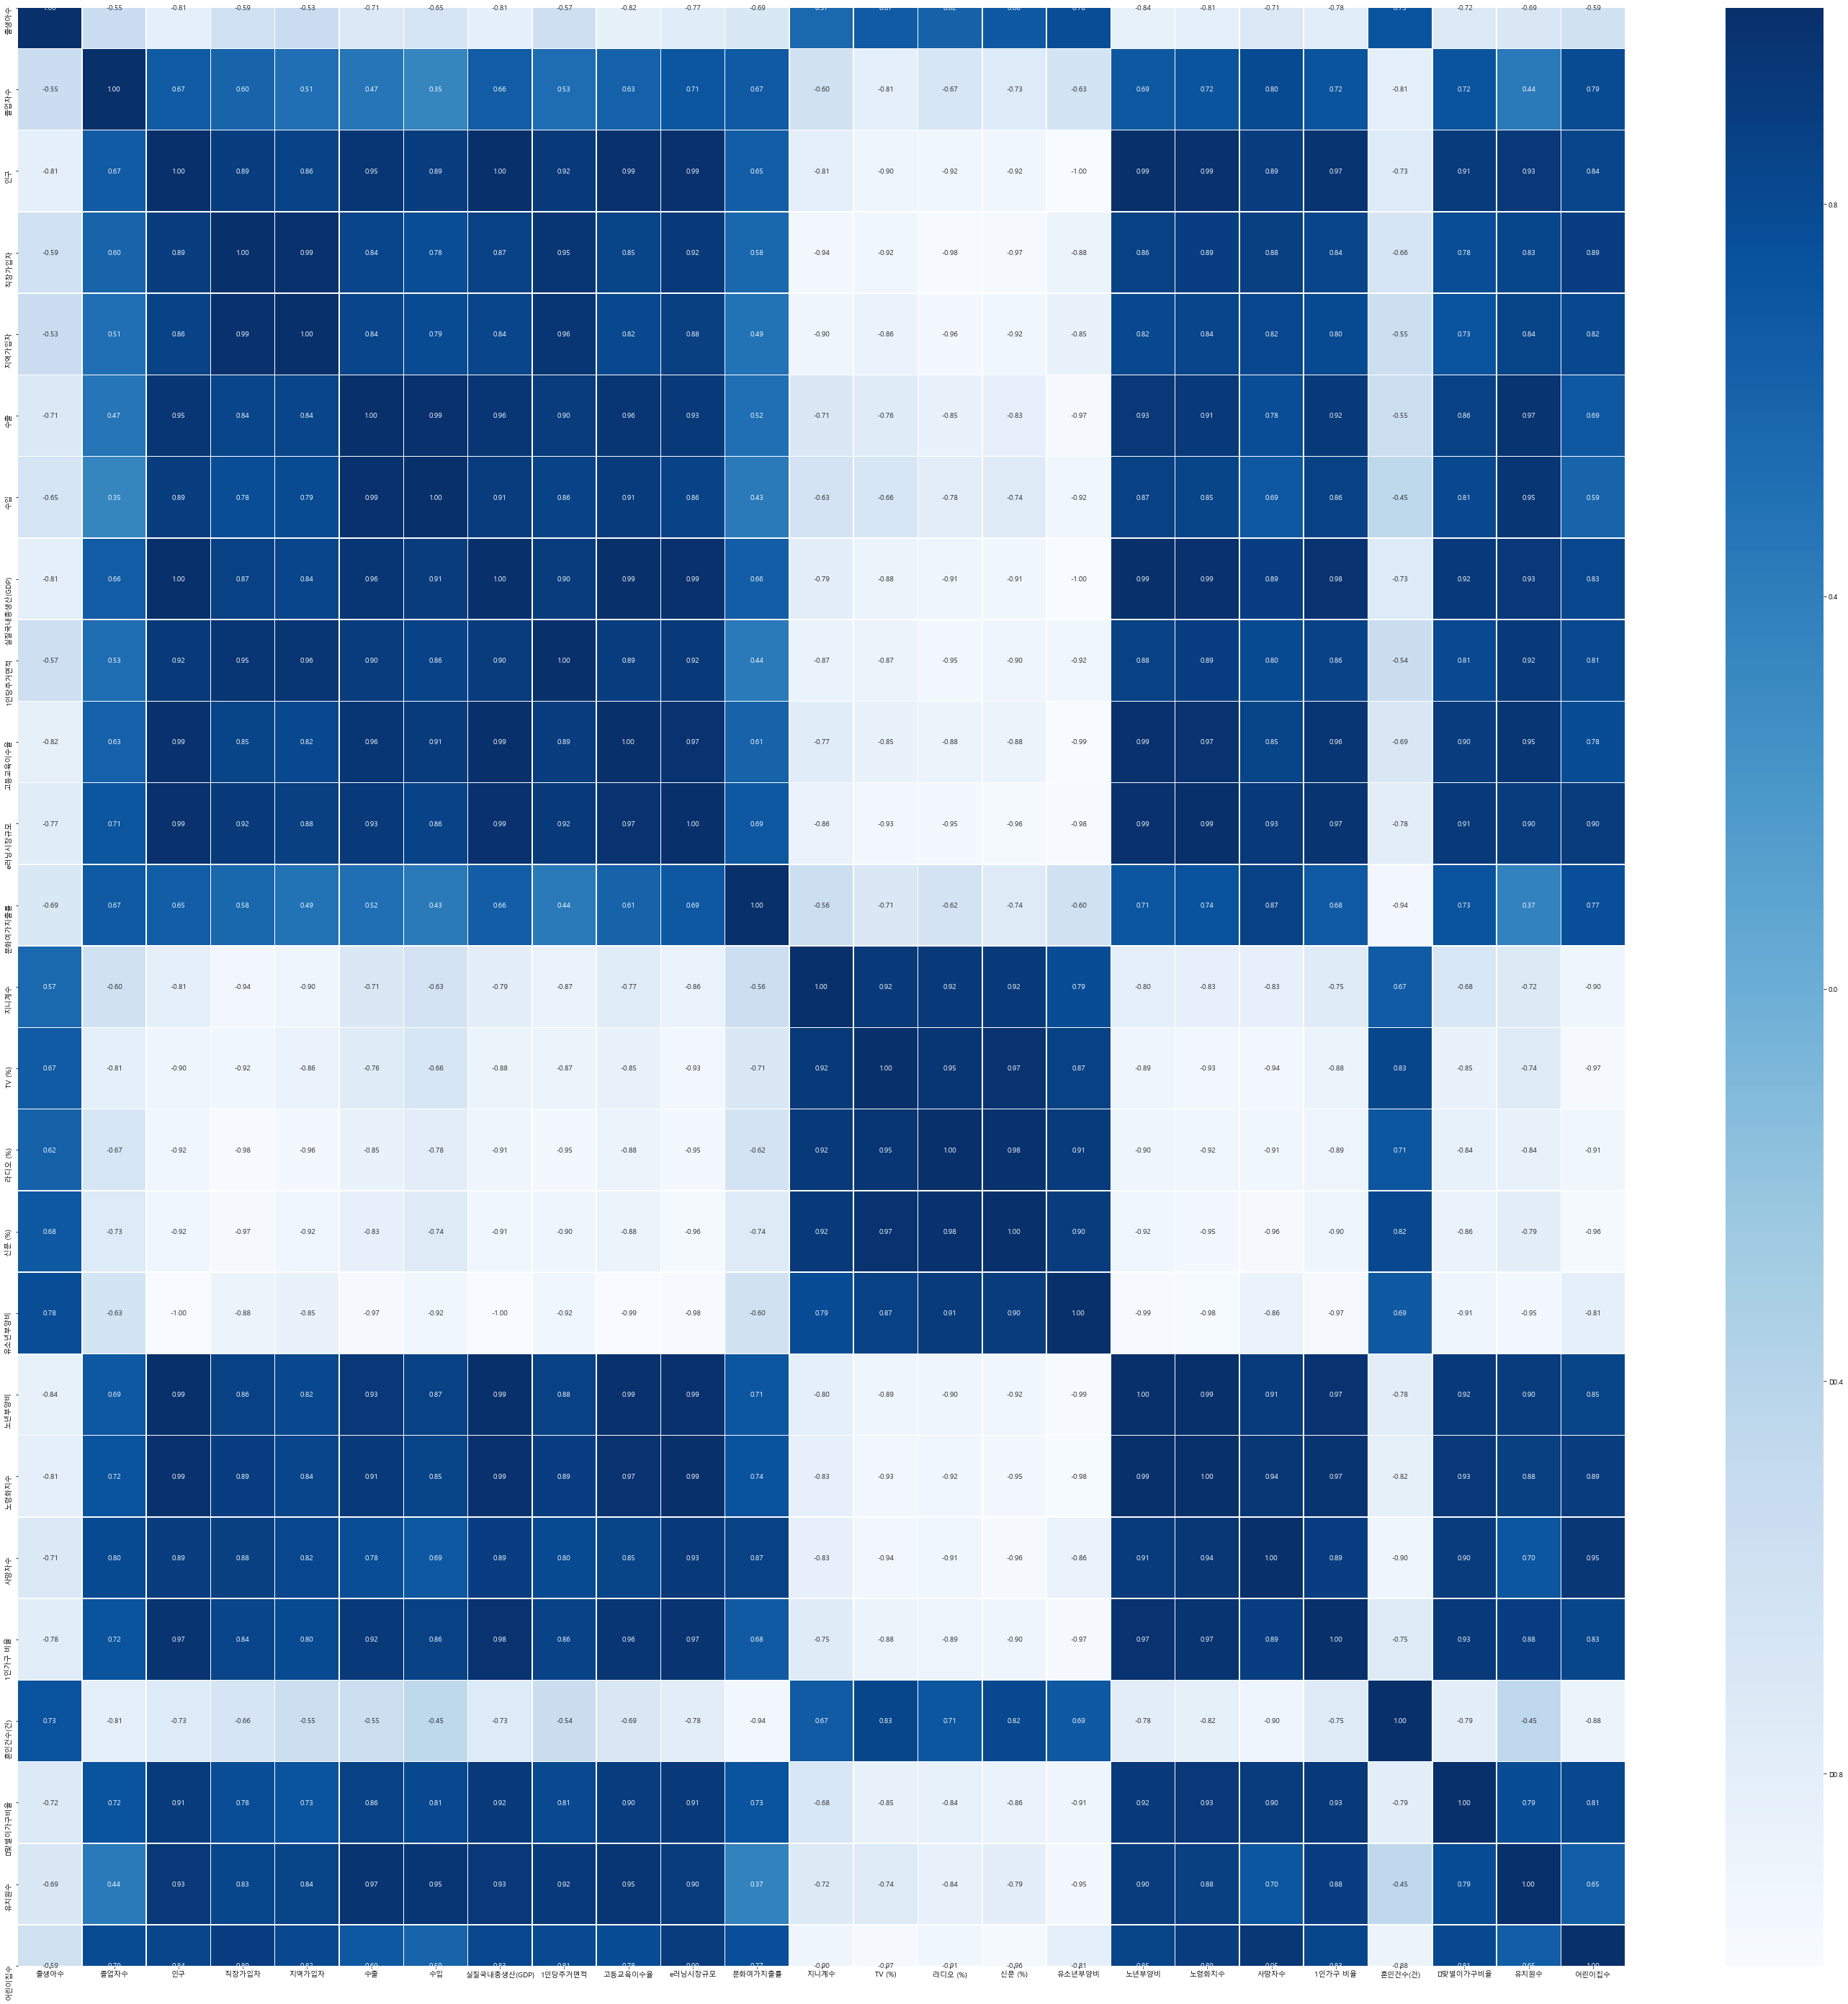

In [18]:
plt.figure(figsize=(50,50))
sns.heatmap(data = rdf.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [19]:
#rdf.corr()

In [20]:
rdf

,출생아수,졸업자수,인구,직장가입자,지역가입자,수출,수입,실질국내총생산(GDP),1인당주거면적,고등교육이수율,...,신문 (%),유소년부양비,노년부양비,노령화지수,사망자수,1인가구 비율,혼인건수(건),\t맞벌이가구비율,유치원수,어린이집수
2000,1.000000,0.148319,0.000000,0.000000,0.000000,0.048036,0.049183,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.089570,0.000000,0.958259,0.069767,0.000000,0.316731
2001,0.744132,0.148319,0.078732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011952,...,1.000000,0.966387,0.042105,0.024485,0.000000,0.000000,0.958259,0.023256,0.033518,0.205619
2002,0.542952,0.148319,0.138441,0.000000,0.000000,0.026476,0.027983,0.085068,0.000000,0.083665,...,1.000000,0.924370,0.094737,0.055412,0.067464,0.000000,0.958259,0.000000,0.117212,0.123883
2003,0.536967,0.148319,0.192283,0.000000,0.000000,0.095458,0.095733,0.122403,0.000000,0.223108,...,1.000000,0.873950,0.147368,0.087629,0.048176,0.000000,0.958259,0.000000,0.198661,0.058748
2004,0.479259,0.148319,0.233642,0.000000,0.000000,0.227555,0.211530,0.185998,0.000000,0.262948,...,1.000000,0.823529,0.200000,0.122423,0.043758,0.000000,0.958259,0.046512,0.311382,0.000000
2005,0.357155,0.148319,0.255832,0.000000,0.000000,0.294836,0.304844,0.241456,0.000000,0.306773,...,1.000000,0.764706,0.252632,0.161082,0.037468,0.328467,0.958259,0.139535,0.371152,0.037037
2006,0.398820,0.148319,0.311009,0.000000,0.000000,0.385162,0.427005,0.312137,0.000000,0.358566,...,1.000000,0.689076,0.305263,0.207474,0.006345,0.328467,0.958259,0.139535,0.406508,0.056194
2007,0.542668,0.148319,0.364362,0.000000,0.000000,0.486444,0.547438,0.394104,0.219178,0.426295,...,1.000000,0.613445,0.357895,0.261598,0.048521,0.328467,0.958259,0.232558,0.472769,0.061303
2008,0.443934,0.148319,0.445055,0.000000,0.000000,0.597614,0.746444,0.439157,0.219178,0.505976,...,1.000000,0.529412,0.410526,0.315722,0.041813,0.328467,0.958259,0.279070,0.580673,0.125160
2009,0.376762,0.148319,0.500101,0.000000,0.000000,0.468937,0.461773,0.451367,0.315068,0.589641,...,1.000000,0.453782,0.452632,0.368557,0.056884,0.328467,0.958259,0.232558,0.664408,0.162197


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.datasets import make_regression
import statsmodels.api as sm
import xgboost as xgb

In [22]:
rdf.shape

(19, 25)

## 독립변수와 상관계수가 낮은 변수만 제거했을때

In [23]:
#X는 rdf.iloc[:,1:]
#Y 는 rdf.iloc[:,:1]

In [24]:
##train, test 나누기
X_train, X_test, y_train, y_test = train_test_split(rdf.iloc[:,1:],rdf.iloc[:,:1], random_state=0)


In [25]:
##모델만들기 1. 선형회귀
model = sm.OLS(y_train, X_train)  
result = model.fit()
print(result.summary())

result.params  

                            OLS Regression Results                            
Dep. Variable:                   출생아수   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                nan
Time:                        10:02:22   Log-Likelihood:                 465.39
No. Observations:                  14   AIC:                            -902.8
Df Residuals:                       0   BIC:                            -893.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
졸업자수             0.5046        inf          0   

C:\Users\ICT01_17\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\ICT01_17\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
C:\Users\ICT01_17\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
C:\Users\ICT01_17\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


졸업자수            0.504561
인구             -0.856668
직장가입자          -0.246992
지역가입자          -0.118592
수출              0.559843
수입              0.785543
실질국내총생산(GDP)   -0.518212
1인당주거면적         0.438943
고등교육이수율         0.841333
e러닝시장규모        -0.412489
문화여가지출률        -0.171140
지니계수           -0.315885
TV (%)          0.539724
라디오 (%)         0.049856
신문 (%)          0.047861
유소년부양비          0.038150
노년부양비          -0.451009
노령화지수          -0.280764
사망자수            0.120198
1인가구 비율        -0.528310
혼인건수(건)         0.174125
\t맞벌이가구비율       0.091185
유치원수           -0.546031
어린이집수           1.046643
dtype: float64

In [26]:
#모델만들기 2. SVR
model = svm.SVR(gamma='scale')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# 모델평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))

df1=pd.DataFrame({'y_data':y_test['출생아수'],'preds':y_pred})
df1.corr()

# 과소인지 과대인지 확인해보자 ( )
print()
print(model)
X_pred=model.predict(X_train)
print('MSE', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("MSE",mean_squared_error(y_test, y_pred))  # mse를 비교했을때 test>train : 과소적합 


MSE 0.010864356285290006
RMSE 0.10423222287416692
0.810396644053722

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
MSE 0.010436565283824664
MSE 0.010864356285290006


C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ICT01_17\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ver

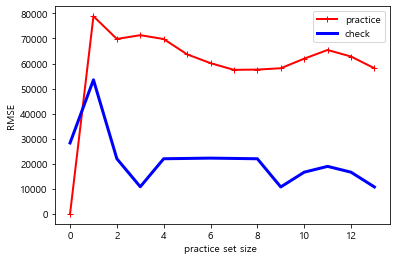

In [27]:
# 과소적합, 과대적합 모델 확인 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))#이 함수는 말그대로 평균 제곱 오차 회귀 손실이다.
    plt.plot(np.sqrt(train_errors), "r+-", linewidth=2, label="practice")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="check")
    plt.legend(loc='upper right')
    plt.xlabel('practice set size ')
    plt.ylabel('RMSE')
    plt.show()

lin_reg = svm.SVR()
plot_learning_curves(lin_reg, X, Y)


In [28]:
# 모델만들기 3. DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# 모델평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
df1=pd.DataFrame({'y_data':y_test['출생아수'],'preds':y_pred})
df1.corr()

# 과소인지 과대인지 확인해보자 ( )
print()
print(model)
X_pred=model.predict(X_train)
print('MSE', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("MSE",mean_squared_error(y_test, y_pred)) 

MSE 0.017418902320654423
RMSE 0.13198068919601239
0.6960075452083418

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
MSE 0.0
MSE 0.017418902320654423


In [29]:
# 모델만들기 4. RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#모델평가
print("MSE",mean_squared_error(y_test, y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print(r2_score(y_test,y_pred))
df1=pd.DataFrame({'y_data':y_test['출생아수'],'preds':y_pred})
df1.corr()

# 과소인지 과대인지 확인해보자 ( )
print()
print(model)
X_pred=model.predict(X_train)
print('MSE', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("MSE",mean_squared_error(y_test, y_pred)) 

MSE 0.00741933676828582
RMSE 0.08613557202622979
0.8705186839217273

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
MSE 0.0045703631297186464
MSE 0.00741933676828582


C:\Users\ICT01_17\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#모델5 XGboost
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test) 

#모델평가
rmse = np.sqrt(mean_squared_error(y_test,preds)) 
print("RMSE : %f" % (rmse))

# 과소인지 과대인지 확인해보자 ( )
print()
print(xg_reg)
X_pred=xg_reg.predict(X_train)
print('MSE', mean_squared_error(y_train, X_pred))
y_pred = model.predict(X_test)
print("MSE",mean_squared_error(y_test, y_pred)) 

df2=pd.DataFrame({'y_data':y_test['출생아수'],'preds':preds})
df2.corr()

[10:02:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 0.126554

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
MSE 4.073322786581766e-06
MSE 0.00741933676828582


,y_data,preds
y_data,1.000000,0.954368
preds,0.954368,1.000000


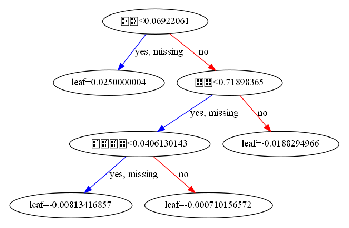

In [31]:
xgb.plot_tree(xg_reg,num_trees=0)
# rc : resource control 한다

plt.rcParams['figure.figsize'] = [30,10]
plt.show()

In [334]:
# 앙상블
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

log_clf = LogisticRegression()
rnd_clf = RandomForestRegressor()
svm_clf = SVC()


voting_clf = VotingRegressor(estimators=[('lr', log_clf),('rf',rnd_clf),('svc',svm_clf)], n_jobs=-1)


In [336]:
#VotingRegressor()
voting_clf.fit(X,Y)

# 앙상블점수
voting_clf.score(X,Y)

ValueError: Unknown label type: 'continuous'

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
유소년부양비          0.231004
노년부양비           0.083681
고등교육이수율         0.073663
실질국내총생산(GDP)    0.062929
유치원수            0.055195
사망자수            0.052483
노령화지수           0.050083
인구              0.046132
어린이집수           0.044550
혼인건수(건)         0.043514
문화여가지출률         0.042351
수입              0.040992
1인가구 비율         0.037127
수출              0.028978
e러닝시장규모         0.024229
직장가입자           0.016449
신문 (%)          0.015342
1인당주거면적         0.012088
\t맞벌이가구비율       0.011682
졸업자수            0.008593
지니계수            0.007532
TV (%)     

Text(0.5, 1.0, '특성중요도')

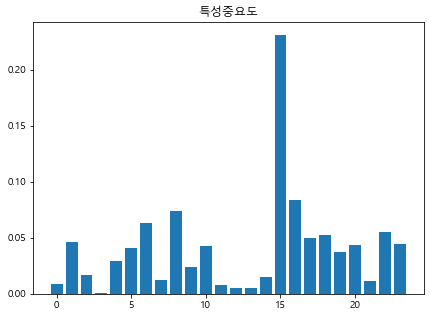

In [287]:
#  영향력있는 변수추출 (randomforest  내에서 지원하는 기능이다.  ) 
print(model)
features = pd.Series(model.feature_importances_,
                    index=X_train.columns).sort_values(ascending=False)
print(features)

f, ax = plt.subplots(figsize = (7,5))  

ax.bar(range(0, len(model.feature_importances_)),
       model.feature_importances_)
ax.set_title('특성중요도')

In [338]:
rdf

,출생아수,졸업자수,인구,직장가입자,지역가입자,수출,수입,실질국내총생산(GDP),1인당주거면적,고등교육이수율,...,신문 (%),유소년부양비,노년부양비,노령화지수,사망자수,1인가구 비율,혼인건수(건),\t맞벌이가구비율,유치원수,어린이집수
2000,1.000000,0.148319,0.000000,0.000000,0.000000,0.048036,0.049183,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.089570,0.000000,0.958259,0.069767,0.000000,0.316731
2001,0.744132,0.148319,0.078732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011952,...,1.000000,0.966387,0.042105,0.024485,0.000000,0.000000,0.958259,0.023256,0.033518,0.205619
2002,0.542952,0.148319,0.138441,0.000000,0.000000,0.026476,0.027983,0.085068,0.000000,0.083665,...,1.000000,0.924370,0.094737,0.055412,0.067464,0.000000,0.958259,0.000000,0.117212,0.123883
2003,0.536967,0.148319,0.192283,0.000000,0.000000,0.095458,0.095733,0.122403,0.000000,0.223108,...,1.000000,0.873950,0.147368,0.087629,0.048176,0.000000,0.958259,0.000000,0.198661,0.058748
2004,0.479259,0.148319,0.233642,0.000000,0.000000,0.227555,0.211530,0.185998,0.000000,0.262948,...,1.000000,0.823529,0.200000,0.122423,0.043758,0.000000,0.958259,0.046512,0.311382,0.000000
2005,0.357155,0.148319,0.255832,0.000000,0.000000,0.294836,0.304844,0.241456,0.000000,0.306773,...,1.000000,0.764706,0.252632,0.161082,0.037468,0.328467,0.958259,0.139535,0.371152,0.037037
2006,0.398820,0.148319,0.311009,0.000000,0.000000,0.385162,0.427005,0.312137,0.000000,0.358566,...,1.000000,0.689076,0.305263,0.207474,0.006345,0.328467,0.958259,0.139535,0.406508,0.056194
2007,0.542668,0.148319,0.364362,0.000000,0.000000,0.486444,0.547438,0.394104,0.219178,0.426295,...,1.000000,0.613445,0.357895,0.261598,0.048521,0.328467,0.958259,0.232558,0.472769,0.061303
2008,0.443934,0.148319,0.445055,0.000000,0.000000,0.597614,0.746444,0.439157,0.219178,0.505976,...,1.000000,0.529412,0.410526,0.315722,0.041813,0.328467,0.958259,0.279070,0.580673,0.125160
2009,0.376762,0.148319,0.500101,0.000000,0.000000,0.468937,0.461773,0.451367,0.315068,0.589641,...,1.000000,0.453782,0.452632,0.368557,0.056884,0.328467,0.958259,0.232558,0.664408,0.162197


In [ ]:
##pca 적용

In [ ]:
from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
rdf.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(data = rdf.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')
plt.show()

In [ ]:
rdf.corr().iloc[:,0]